In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *

In [134]:
data=pd.read_csv("F:\\lm advertising\\advertising.csv")
data.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad Topic Line,City,gender,Country,Timestamp,Clicked_on_Ad
0,65.40,33,66699.12,247.31,Adaptive 24hour Graphic Interface,Sylviaview,0,Palau,2/12/2016 22:51,0
1,73.30,36,68211.35,135.72,Adaptive asynchronous attitude,West Tanya,1,Hungary,1/30/2016 4:38,1
2,44.57,31,38349.78,133.17,Adaptive context-sensitive application,Joneston,1,China,3/27/2016 9:11,1
3,62.06,44,44174.25,105.00,Adaptive contextually-based methodology,Port Paultown,0,Austria,4/12/2016 14:01,1
4,63.80,38,36037.33,108.70,Adaptive demand-driven knowledgebase,Colebury,1,Tuvalu,3/19/2016 0:27,1


In [135]:
data=data.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1)
data.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,gender,Clicked_on_Ad
0,65.40,33,66699.12,247.31,0,0
1,73.30,36,68211.35,135.72,1,1
2,44.57,31,38349.78,133.17,1,1
3,62.06,44,44174.25,105.00,0,1
4,63.80,38,36037.33,108.70,1,1


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily_Time_Spent_on_Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area_Income               1000 non-null   float64
 3   Daily_Internet_Usage      1000 non-null   float64
 4   gender                    1000 non-null   int64  
 5   Clicked_on_Ad             1000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


In [137]:
data.describe()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,gender,Clicked_on_Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


                          Daily_Time_Spent_on_Site       Age  Area_Income  \
Daily_Time_Spent_on_Site                  1.000000 -0.331513     0.310954   
Age                                      -0.331513  1.000000    -0.182605   
Area_Income                               0.310954 -0.182605     1.000000   
Daily_Internet_Usage                      0.518658 -0.367209     0.337496   
gender                                   -0.018951 -0.021044     0.001322   
Clicked_on_Ad                            -0.748117  0.492531    -0.476255   

                          Daily_Internet_Usage    gender  Clicked_on_Ad  
Daily_Time_Spent_on_Site              0.518658 -0.018951      -0.748117  
Age                                  -0.367209 -0.021044       0.492531  
Area_Income                           0.337496  0.001322      -0.476255  
Daily_Internet_Usage                  1.000000  0.028012      -0.786539  
gender                                0.028012  1.000000      -0.038027  
Clicked_on_Ad   

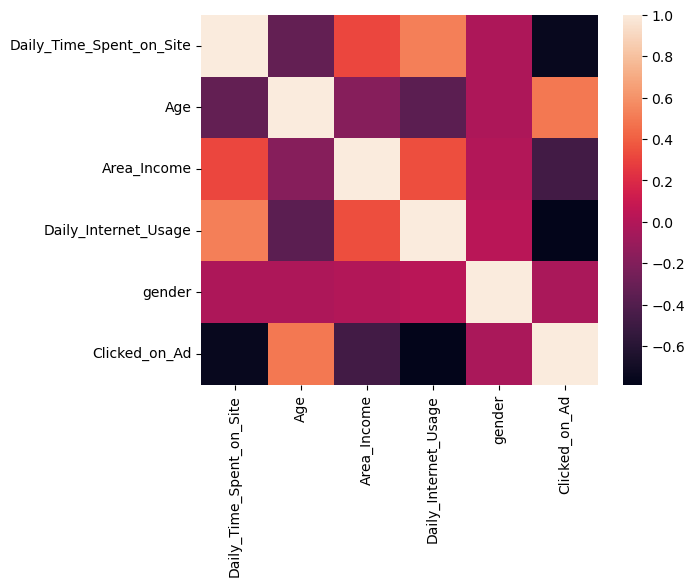

In [90]:
print(data.corr())
dataplot=sns.heatmap(data.corr())
plt.show()

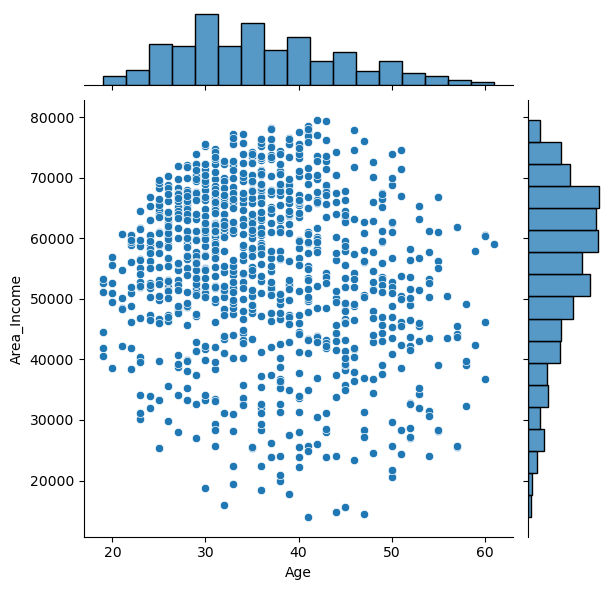

In [138]:
sns.jointplot(x='Age', y='Area_Income', data=data)

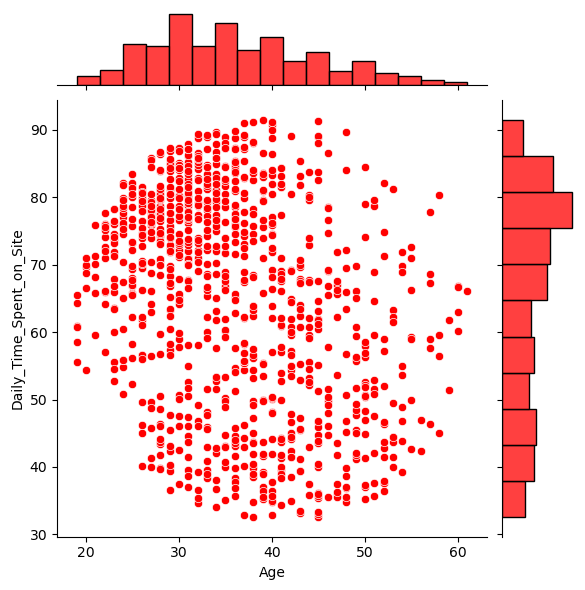

In [139]:
sns.jointplot(x='Age', y='Daily_Time_Spent_on_Site', data=data,kind='scatter',color='red')

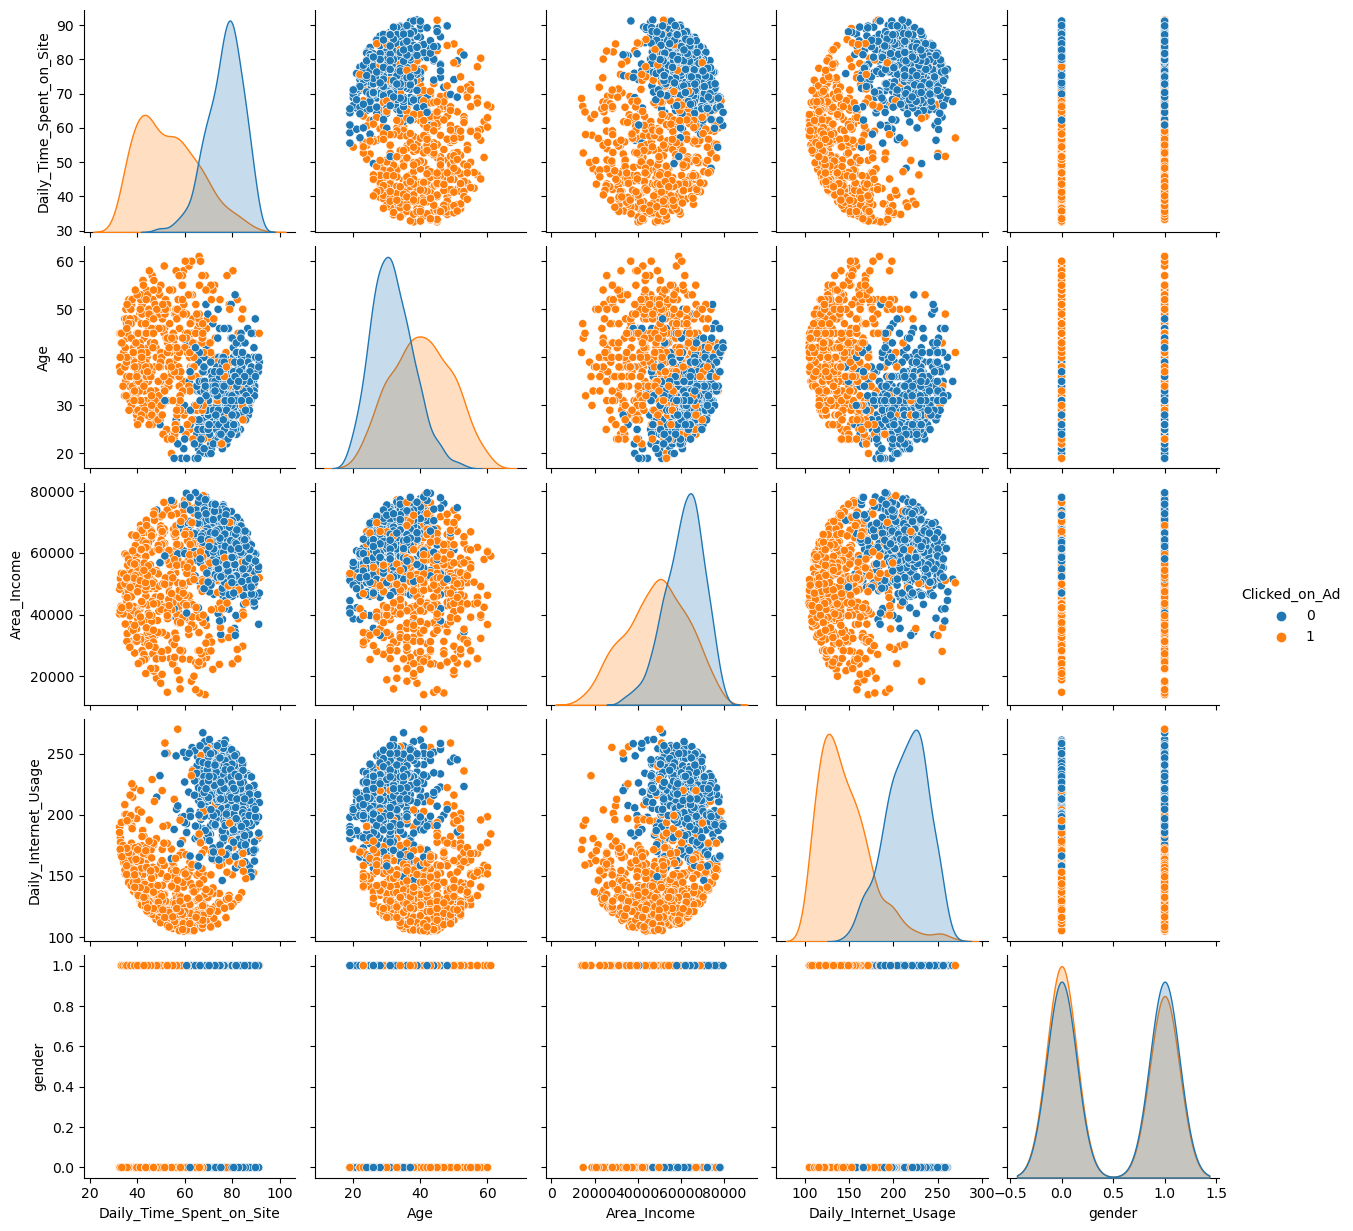

In [140]:
sns.pairplot(data, hue="Clicked_on_Ad")

In [159]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula= 'Clicked_on_Ad~ Daily_Time_Spent_on_Site+Age +Area_Income +Daily_Internet_Usage+ gender'
model1= smf.glm(formula=formula, data=data, family=sm.families.Binomial()).fit()

# print model summary
print(model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Clicked_on_Ad   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      994
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -90.904
Date:                Sat, 29 Apr 2023   Deviance:                       181.81
Time:                        17:26:15   Pearson chi2:                     806.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.7002
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [160]:
# predict class labels
y_pred1 = model1.predict(x)
y_pred_class = (y_pred1 > 0.5).astype(int)

# create confusion matrix
cm1 = confusion_matrix(y, y_pred_class)

# print confusion matrix
print(cm1)

[[491   9]
 [ 19 481]]


491 cases were predicted as negative and were actually negative (true negatives). 9 cases were predicted as positive but were actually negative (false positives). 19 cases were predicted as negative but were actually positive (false negatives). 481 cases were predicted as positive and were actually positive (true positives).

In [161]:
from sklearn.metrics import roc_auc_score, brier_score_loss 
# calculate the c-statistic (AUC-ROC)
y_true = data['Clicked_on_Ad']
y_prob = model1.predict(data)
auc_roc = roc_auc_score(y_true, y_prob)
print("C-statistic (AUC-ROC): ", auc_roc)

# calculate the Brier score
y_pred = y_prob.round()
brier_score = brier_score_loss(y_true, y_pred)
print("Brier score: ", brier_score)


C-statistic (AUC-ROC):  0.9918
Brier score:  0.028


In [162]:
#now we are drawing caliberation curve


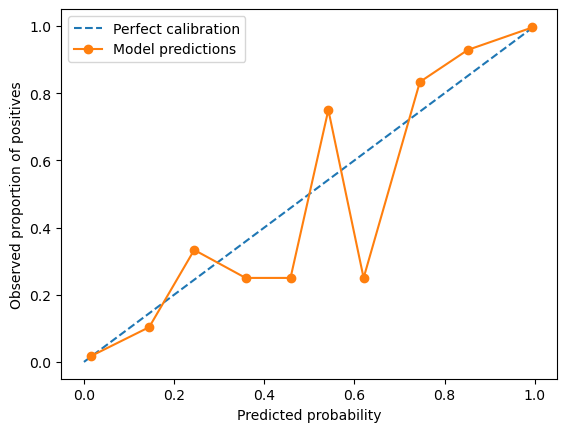

In [163]:
from sklearn.calibration import calibration_curve
bin_means, y_prob_bin_means = calibration_curve(y_true, y_prob, n_bins=10)
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect calibration')
plt.plot(y_prob_bin_means, bin_means, marker='o', label='Model predictions')
plt.xlabel('Predicted probability')
plt.ylabel('Observed proportion of positives')
plt.legend()
plt.show()